# FINAL PROJECT : EXOPLANET

Here is the meaning of the column's name :

* Col 1. sy_snum : Number of Stars: Number of stars in the planetary system of the exoplanet described in the line.
* Col 2. sy_pnum : Number of Planets: Number of planets in the planetary system of the exoplanet described in the line.
* Col 3. disc_year : Discovery Year
* Col 4. pl_orbper : Orbital Period [days]: Duration in days of the planet's orbit (for Earth, it would be 365, for example).
* Col 5. pl_orbsmax : Orbit Semi-Major Axis [au]): Orbital radius in astronomical units. It is the distance from a planet to its star. For Earth, this would be 1.
* Col 6. pl_bmasse : Planet Mass or Mass*sin(i) [Earth Mass]:Mass of the planet in terms of Earth's mass.
* Col 7. pl_orbeccen : Eccentricity: Parameter that indicates the flattening of the orbit (whether it is a circle or an ellipse).
* Col 8. st_mass : Stellar Mass [Solar mass]: Mass of the planet relative to the mass of its star.
* Col 9. ra :  RA [deg]: Coordinates 1 in the sky for the planet.
* Col 10. dec : Dec [deg]: Coordinates 2 in the sky for the planet.
* Col 11. sy_dist : Distance [pc]: Distance of the planet relative to us (in parsecs, with 1 parsec = 3.26 light-years).
* Col 12. sy_vmag : V (Johnson) Magnitude: Luminosity of the star in the green.
* Col 13. sy_kmag : Ks (2MASS) Magnitude: Luminosity of the star in the infrared.
* Col 14. sy_gaiamag :  Gaia Magnitude: Luminosity of the star in the red.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
exoplanet = pd.read_csv('../data/raw/Claire_exo.csv')

In [3]:
exoplanet.head()

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbsmax,pl_bmasse,pl_orbeccen,st_mass,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,1,1,1995,4.231000,0.052000,146.20180,0.0000,1.04,344.367540,20.769096,15.4614,5.45309,3.911,5.28647
1,1,1,1995,4.230785,0.052700,150.00900,0.0130,1.03,344.367540,20.769096,15.4614,5.45309,3.911,5.28647
2,1,1,1995,4.230797,0.052350,147.47238,0.0042,1.07,344.367540,20.769096,15.4614,5.45309,3.911,5.28647
3,1,3,1996,1076.600000,2.100000,778.68350,0.0120,1.06,164.864761,40.430493,13.7967,5.03352,3.750,4.87837
4,2,5,1996,14.651520,0.115227,263.97850,0.0034,0.95,133.146837,28.329815,12.5855,5.95084,4.015,5.72973


In [4]:
exoplanet.shape

(3505, 14)

In [5]:
columns = list(exoplanet.columns)
columns

['sy_snum',
 'sy_pnum',
 'disc_year',
 'pl_orbper',
 'pl_orbsmax',
 'pl_bmasse',
 'pl_orbeccen',
 'st_mass',
 'ra',
 'dec',
 'sy_dist',
 'sy_vmag',
 'sy_kmag',
 'sy_gaiamag']

# Cleaning data

In [6]:
# search for null values
exoplanet.isna().sum()

sy_snum        0
sy_pnum        0
disc_year      0
pl_orbper      0
pl_orbsmax     0
pl_bmasse      0
pl_orbeccen    0
st_mass        0
ra             0
dec            0
sy_dist        0
sy_vmag        0
sy_kmag        0
sy_gaiamag     0
dtype: int64

In [7]:
# drop columns that might not be relevant for the exoplanet study
exoplanet = exoplanet.drop(['ra', 'dec'], axis=1)

In [8]:
# drop an outlier
exoplanet = exoplanet.drop(3042, axis=0)

In [9]:
exoplanet.head()

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbsmax,pl_bmasse,pl_orbeccen,st_mass,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,1,1,1995,4.231000,0.052000,146.20180,0.0000,1.04,15.4614,5.45309,3.911,5.28647
1,1,1,1995,4.230785,0.052700,150.00900,0.0130,1.03,15.4614,5.45309,3.911,5.28647
2,1,1,1995,4.230797,0.052350,147.47238,0.0042,1.07,15.4614,5.45309,3.911,5.28647
3,1,3,1996,1076.600000,2.100000,778.68350,0.0120,1.06,13.7967,5.03352,3.750,4.87837
4,2,5,1996,14.651520,0.115227,263.97850,0.0034,0.95,12.5855,5.95084,4.015,5.72973


My dataset is clean :
 - There is no missing values
 - All column names are in lower cases
 - All column names have _ between words
 - All the columns that remain are usefull for the project

## Data Exploration

In [10]:
# Display our variables types
exoplanet.dtypes

sy_snum          int64
sy_pnum          int64
disc_year        int64
pl_orbper      float64
pl_orbsmax     float64
pl_bmasse      float64
pl_orbeccen    float64
st_mass        float64
sy_dist        float64
sy_vmag        float64
sy_kmag        float64
sy_gaiamag     float64
dtype: object

In [11]:
exoplanet.describe().T

,count,mean,std,min,25%,50%,75%,max
sy_snum,3504.0,1.234304,0.492199,1.000000,1.000000,1.000000,1.000000,4.00000
sy_pnum,3504.0,1.783961,1.196562,1.000000,1.000000,1.000000,2.000000,6.00000
disc_year,3504.0,2012.213185,6.783082,1995.000000,2008.000000,2012.000000,2018.000000,2023.00000
pl_orbper,3504.0,1051.710928,3788.816628,0.179715,4.231229,31.716205,653.219978,77114.07158
pl_orbsmax,3504.0,1.305913,2.698496,0.005800,0.052000,0.180355,1.570000,36.98400
pl_bmasse,3504.0,799.990006,1386.222359,0.070000,44.812000,292.403600,824.500000,17668.16970
pl_orbeccen,3504.0,0.179841,0.200420,0.000000,0.030000,0.110000,0.260000,0.97000
st_mass,3504.0,1.067160,0.504632,0.090000,0.850000,1.030000,1.220000,10.94000
sy_dist,3504.0,181.485423,272.052052,1.301190,33.255000,64.642550,213.283000,2501.75000
sy_vmag,3504.0,9.443788,2.806719,3.230060,7.460000,8.970000,11.717000,19.62020


I consider there is three types of columns :
 1. Informative columns -> informativ_columns = ["sy_snum", "sy_pnum", "disc_year"]
 2. Columns that inform about type of lights -> lights_columns = ["sy_vmag", "sy_kmag", "sy_gaiamag"]
 3. Columns in wich we will find our target colum and the features
    ->columns_to_study = ['pl_orbper', 'pl_orbsmax', 'pl_bmasse', 'pl_orbeccen', 'st_mass','sy_dist']

In [12]:
# Let's look at the informatives columns

informativ_columns = ["sy_snum", "sy_pnum", "disc_year"]

for column in informativ_columns:
    print(exoplanet[column].value_counts())
    print("\n")

sy_snum
1    2789
2     613
3      98
4       4
Name: count, dtype: int64


sy_pnum
1    2031
2     811
3     295
4     202
5      85
6      80
Name: count, dtype: int64


disc_year
2009    226
2011    219
2022    195
2010    190
2014    190
2016    182
2012    176
2019    171
2021    169
2015    167
2018    156
2007    151
2008    141
2020    138
2002    123
2023    119
2017    118
2005    107
2013     88
2004     85
2003     75
2000     72
2006     69
1999     53
2001     51
1998     34
1996     32
1997      4
1995      3
Name: count, dtype: int64




/var/folders/jj/7c0z5mzs4y128nfwqptlsf000000gn/T/ipykernel_25576/4231543049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exoplanet[col])
/var/folders/jj/7c0z5mzs4y128nfwqptlsf000000gn/T/ipykernel_25576/4231543049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exoplanet[col])
/var/fol

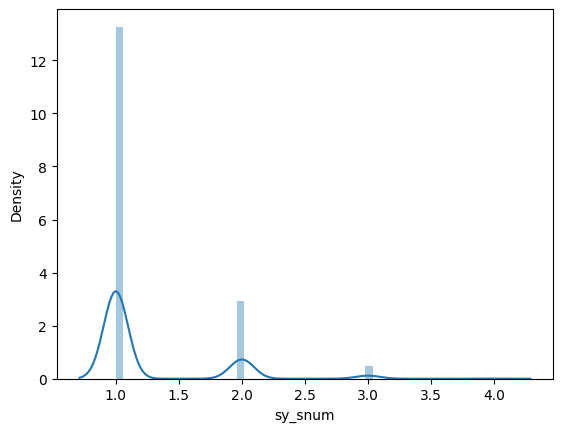

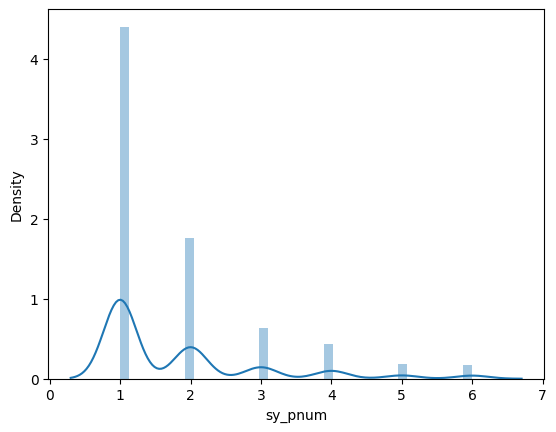

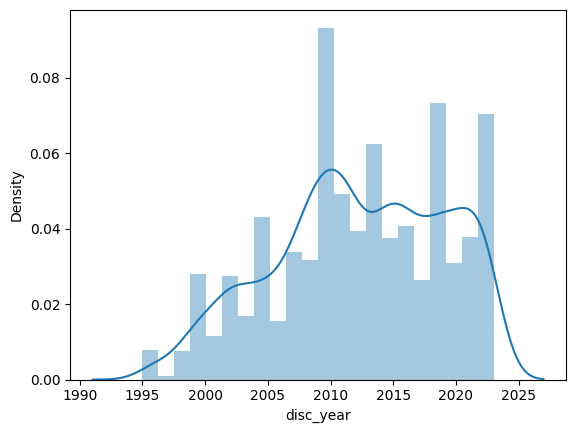

In [13]:
for col in informativ_columns:
    plt.figure()
    sns.distplot(exoplanet[col])

In [14]:
#Let's look at the lights columns
lights_columns = ["sy_vmag", "sy_kmag", "sy_gaiamag"]

for column in lights_columns:
    print(exoplanet[column].value_counts())
    print("\n")

sy_vmag
5.95084     42
8.97000     31
10.16000    29
8.05000     24
7.17000     23
            ..
10.53000     1
11.14900     1
19.62020     1
15.83800     1
10.30800     1
Name: count, Length: 1189, dtype: int64


sy_kmag
4.015     42
5.010     24
3.261     20
7.060     14
4.793     14
          ..
7.437      1
9.280      1
11.391     1
9.505      1
11.642     1
Name: count, Length: 1377, dtype: int64


sy_gaiamag
5.72973     42
8.87530     24
5.24020     20
6.84367     14
8.76221     13
            ..
9.64956      1
11.06700     1
8.74481      1
10.92770     1
5.13228      1
Name: count, Length: 1477, dtype: int64




<Axes: >

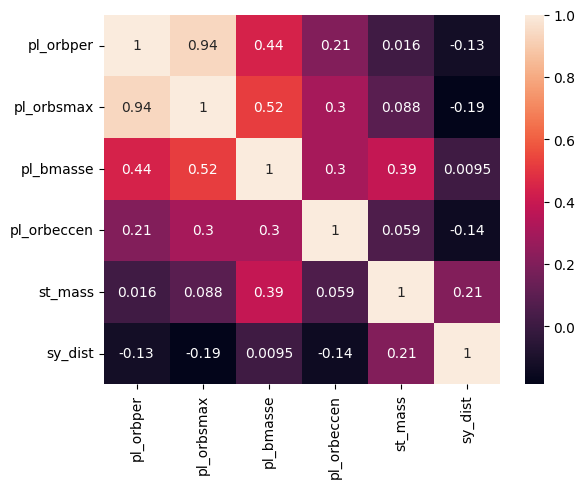

In [15]:
# Let's look at the other columns 
columns_to_study = ['pl_orbper', 'pl_orbsmax', 'pl_bmasse', 'pl_orbeccen', 'st_mass','sy_dist']
sns.heatmap(exoplanet[columns_to_study].corr(), annot=True)

We can see a high correlation between pl_orbper(->planet's orbital period,in days. For earth, the orbital period is 365), and
pl_orbsmax(->Orbital radius in astronomical units. It is the distance from a planet to its star. For Earth, this would be 1).
Let's visualize the distributions of "columns to study".
columns_to_study = 'pl_orbper', 'pl_orbsmax', 'pl_bmasse', 'pl_orbeccen', 'st_mass','sy_dist'

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

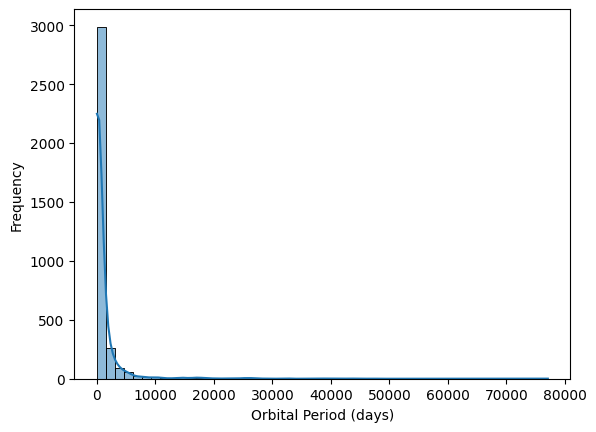

In [17]:
# visualize the distributions of column 'pl_orbper' : 
# Orbital Period [days]: Duration in days of the planet's orbit (for Earth, it would be 365, for example).
sns.histplot(exoplanet['pl_orbper'], bins=50, kde=True)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Frequency')
plt.show()

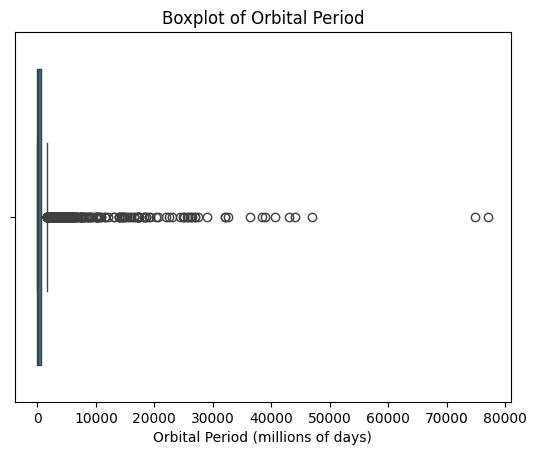

In [18]:
# visualize again the distributions of column 'pl_orbper' with a boxplot
sns.boxplot(x=exoplanet['pl_orbper'])
plt.xlabel('Orbital Period (millions of days)')
plt.title('Boxplot of Orbital Period')
plt.show()

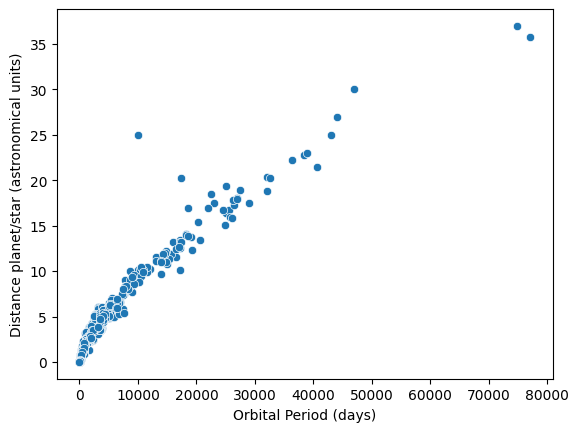

In [19]:
# visualize the relationship between column 'pl_orbsmax'(y-axis) and column 'pl_orbper'(x-axis)
# 'pl_orbsmax'-> Orbit Semi-Major Axis [au]): Orbital radius in astronomical units = the distance from a planet to its star.
# For Earth, this would be 1.
sns.scatterplot(x='pl_orbper', y='pl_orbsmax', data=exoplanet)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Distance planet/star (astronomical units)')
plt.show()

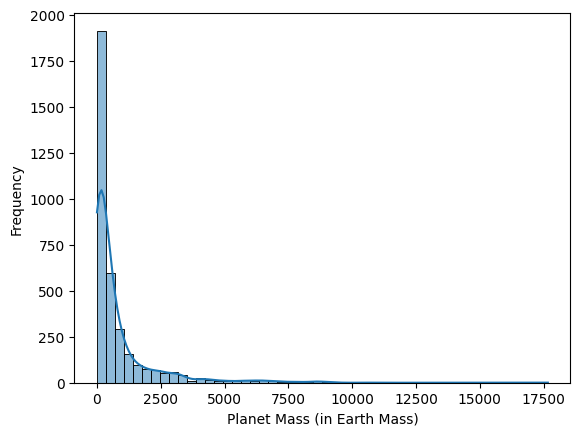

In [20]:
# visualize the distributions of column 'pl_bmasse' : 
# Planet Mass or Mass*sin(i) [Earth Mass]:Mass of the planet in terms of Earth's mass.
sns.histplot(exoplanet['pl_bmasse'], bins=50, kde=True)
plt.xlabel('Planet Mass (in Earth Mass)')
plt.ylabel('Frequency')
plt.show()

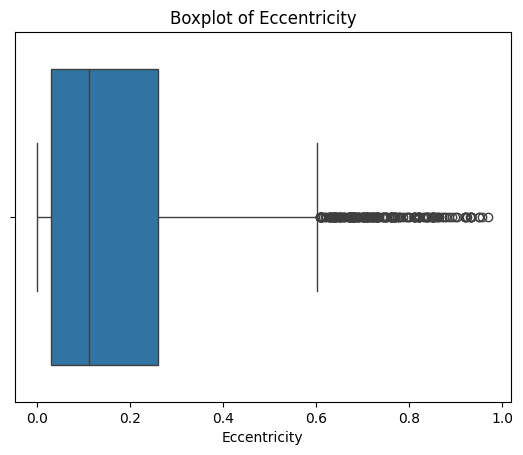

In [21]:
# visualize the distributions of column 'pl_orbeccen' : 
# -> Eccentricity: Parameter that indicates the flattening of the orbit (whether it is a circle or an ellipse).
sns.boxplot(x=exoplanet['pl_orbeccen'])
plt.xlabel('Eccentricity')
plt.title('Boxplot of Eccentricity')
plt.show()

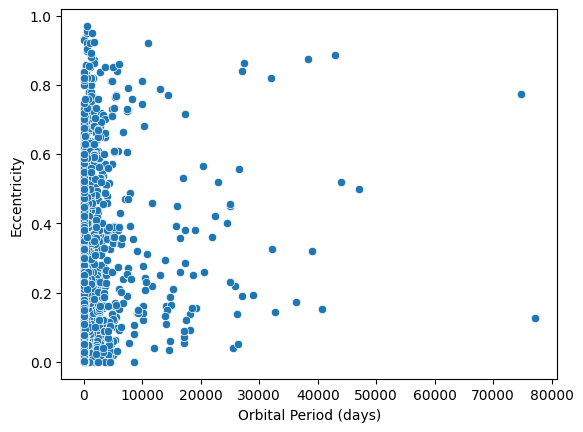

In [22]:
# visualize the distributions of the relationship between column 'pl_orbeccen'(y-axis) and column 'pl_orbper'(x-axis)
sns.scatterplot(x='pl_orbper', y='pl_orbeccen', data=exoplanet)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Eccentricity')
plt.show()

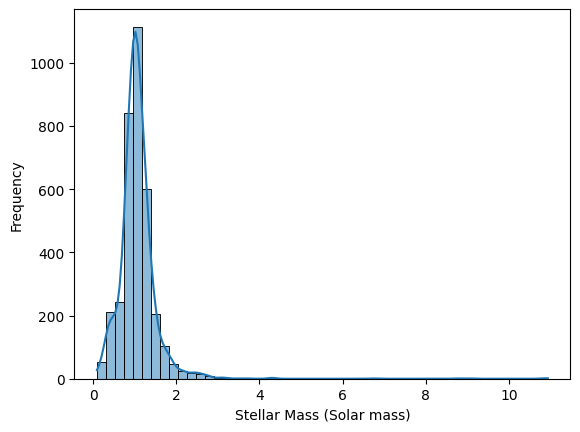

In [23]:
# visualize the distributions of column 'st_mass' :
# Stellar Mass [Solar mass]: Mass of the planet relative to the mass of its star.
sns.histplot(exoplanet['st_mass'], bins=50, kde=True)
plt.xlabel('Stellar Mass (Solar mass)')
plt.ylabel('Frequency')
plt.show()

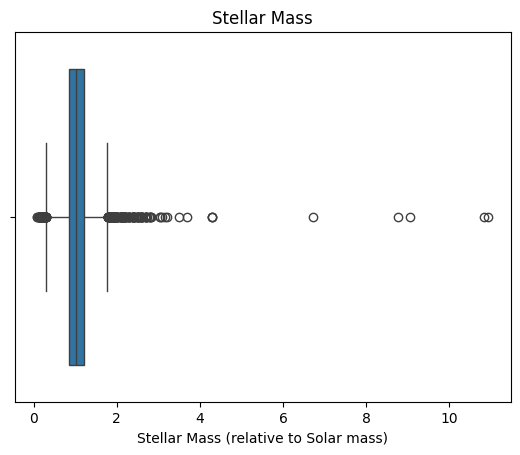

In [24]:
# visualize again the distributions of column 'st_mass' with a boxplot
sns.boxplot(x=exoplanet['st_mass'])
plt.xlabel('Stellar Mass (relative to Solar mass)')
plt.title('Stellar Mass')
plt.show()

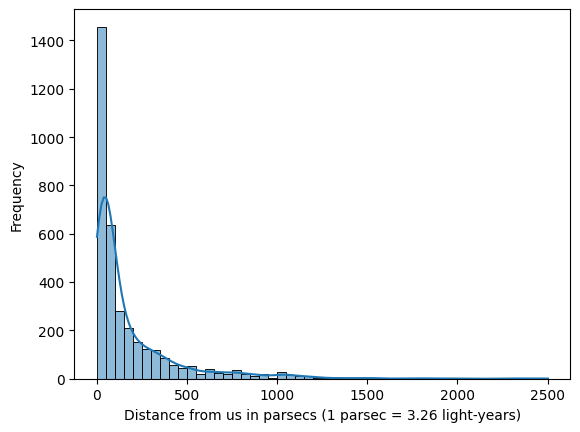

In [25]:
# visualize the distributions of column 'sy_dist' : 
# Distance [pc]: Distance of the planet relative to us (in parsecs, with 1 parsec = 3.26 light-years). 
sns.histplot(exoplanet['sy_dist'], bins=50, kde=True)
plt.xlabel('Distance from us in parsecs (1 parsec = 3.26 light-years)')
plt.ylabel('Frequency')
plt.show()

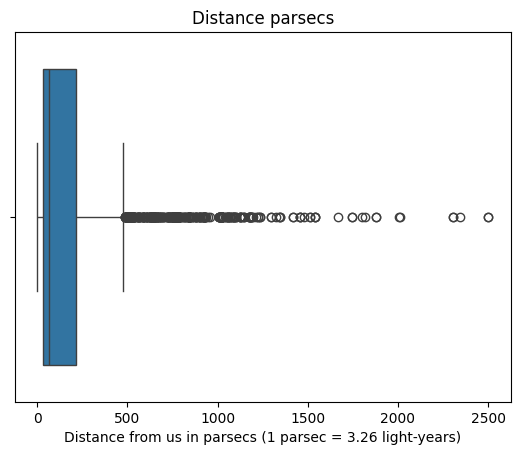

In [26]:
# visualize again the distributions of column 'sy_dist' with a boxplot
sns.boxplot(x=exoplanet['sy_dist'])
plt.xlabel('Distance from us in parsecs (1 parsec = 3.26 light-years)')
plt.title('Distance parsecs')
plt.show()

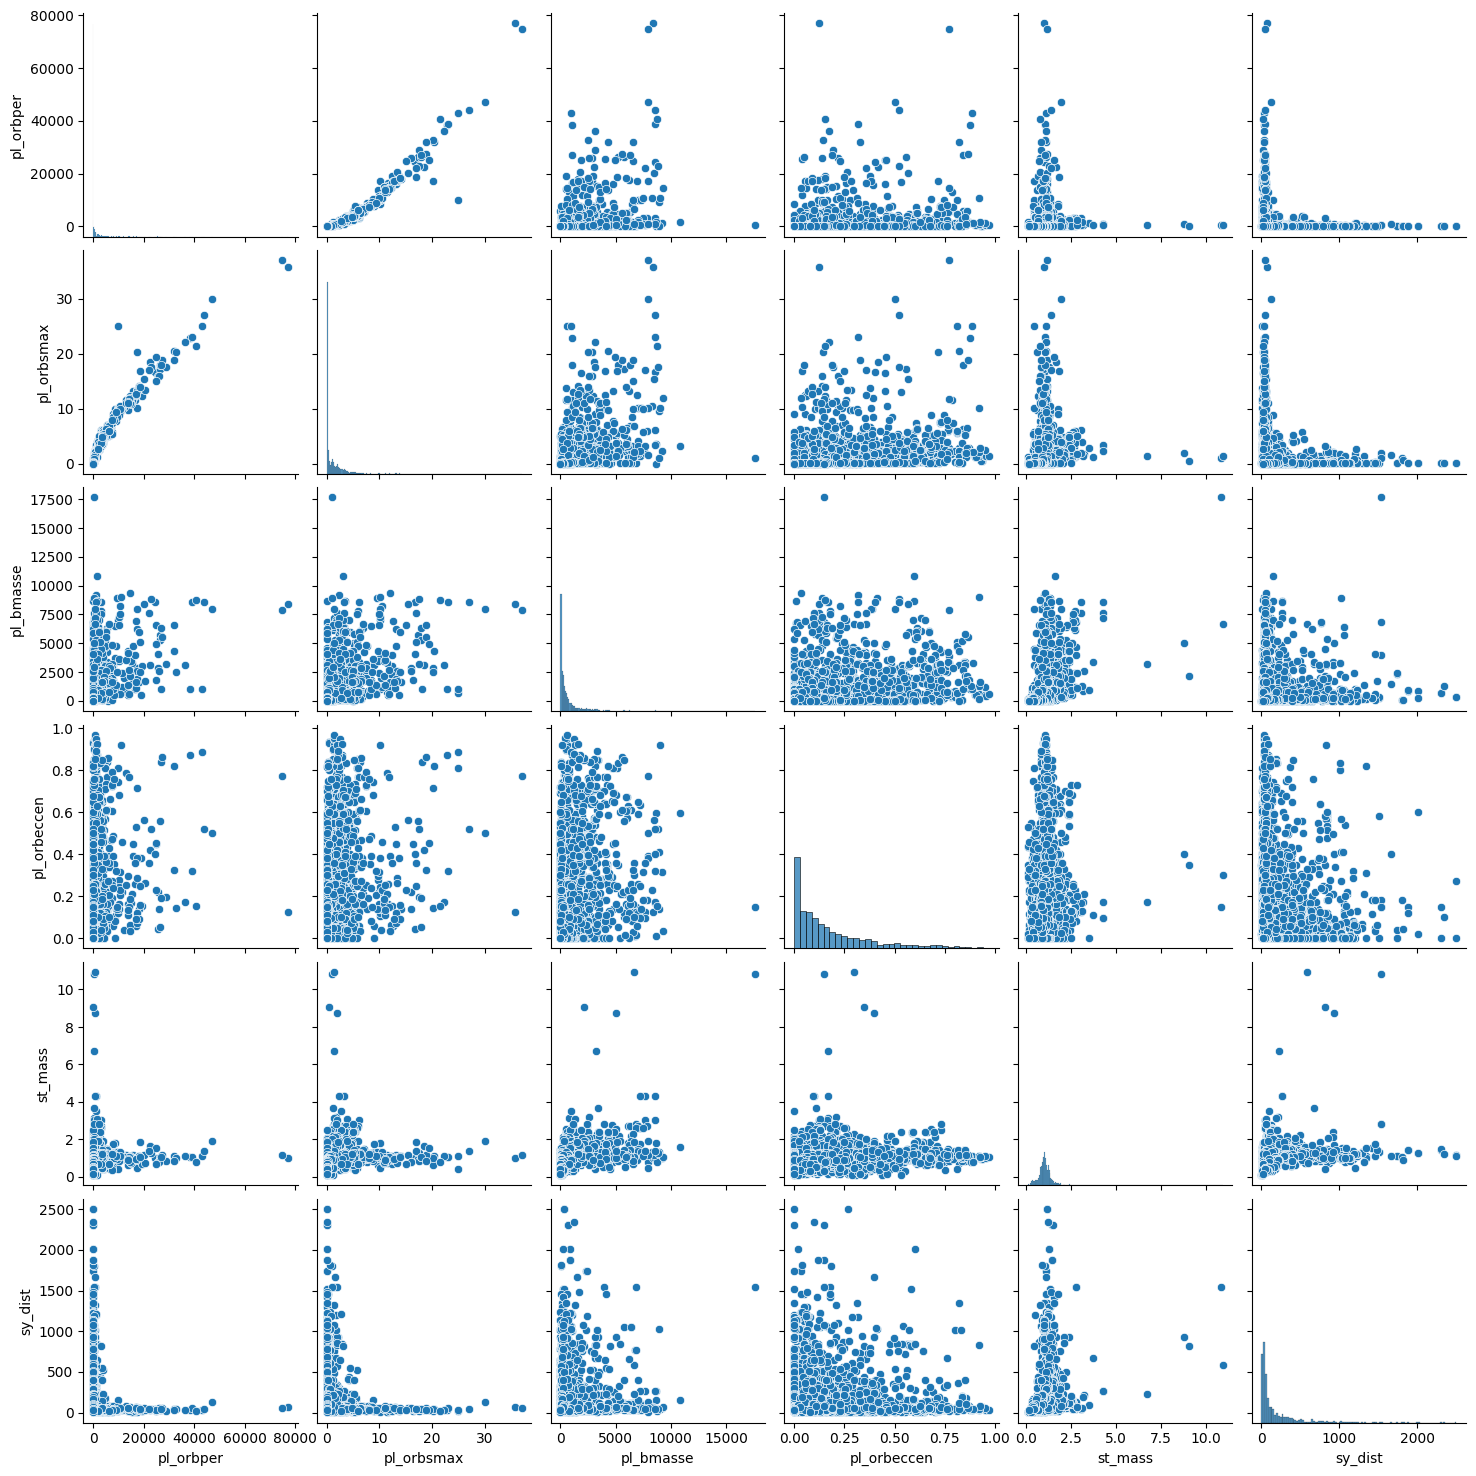

In [27]:
sns.pairplot(exoplanet[columns_to_study])
plt.show()

## Data Processing

1. How many planets, on average, are there in a planetary system with one star? Two stars? Three stars?
2. Has the distance of planets (distance relative to us) increased from 1995 to nowadays? 
3. How does the mass of a planet vary based on its distance from its star? 
4. What is the orbital duration of a planet based on its eccentricity? 
5. What is the mass of a planet based on the duration of its orbit?



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
# 1. How many planets, on average, are there in a planetary system with one star? Two stars? Three stars? 
exoplanet.groupby("sy_snum").agg({"sy_pnum": 'mean'})

,sy_pnum
sy_snum,
1,1.762639
2,1.928222
3,1.520408
4,1.000000


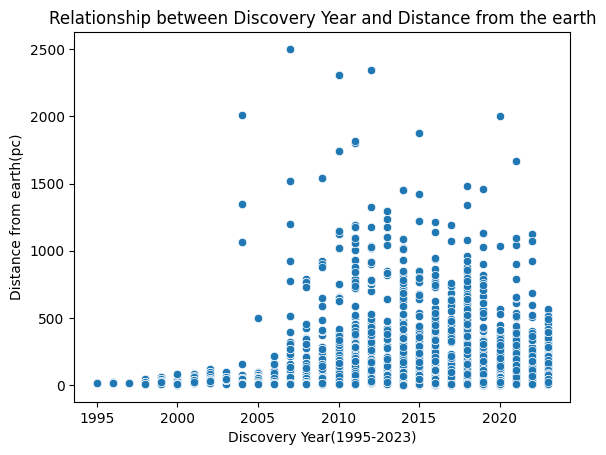

In [30]:
# 2. Has the distance of planets (distance relative to us) increased from 1995 to nowadays?
sns.scatterplot(x='disc_year', y='sy_dist', data=exoplanet)
plt.xlabel('Discovery Year(1995-2023)')
plt.ylabel('Distance from earth(pc)')
plt.title('Relationship between Discovery Year and Distance from the earth')

plt.show()

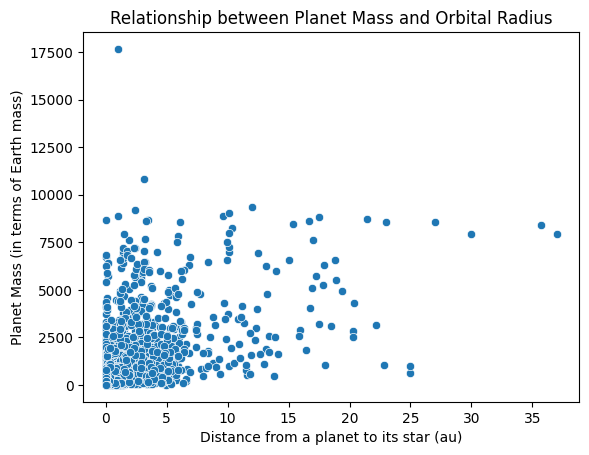

In [31]:
# 3. How does the mass of a planet vary based on its distance from its star? 
# reminder : pl_orbsmax-> Orbit Semi-Major Axis [au]): Orbital radius in astronomical units. Distance from a planet to its star(For Earth, this would be 1)
sns.scatterplot(x='pl_orbsmax', y='pl_bmasse', data=exoplanet)
plt.xlabel('Distance from a planet to its star (au)')
plt.ylabel('Planet Mass (in terms of Earth mass)')
plt.title('Relationship between Planet Mass and Orbital Radius')

plt.show()

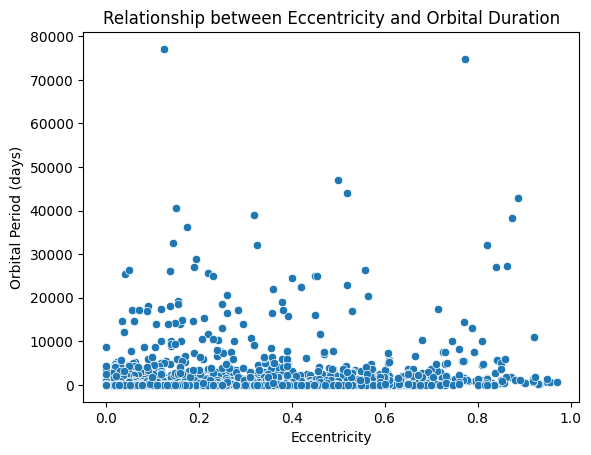

In [33]:
# 4. What is the orbital duration of a planet based on its eccentricity?
sns.scatterplot(x='pl_orbeccen', y='pl_orbper', data=exoplanet)
plt.xlabel('Eccentricity')
plt.ylabel('Orbital Period (days)')
plt.title('Relationship between Eccentricity and Orbital Duration')

plt.show()

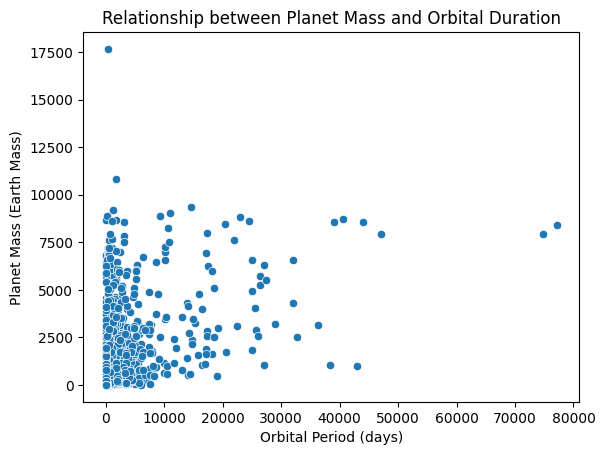

In [34]:
# 5. What is the mass of a planet based on the duration of its orbit? 
sns.scatterplot(x='pl_orbper', y='pl_bmasse', data=exoplanet)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Mass (Earth Mass)')
plt.title('Relationship between Planet Mass and Orbital Duration')

plt.show()

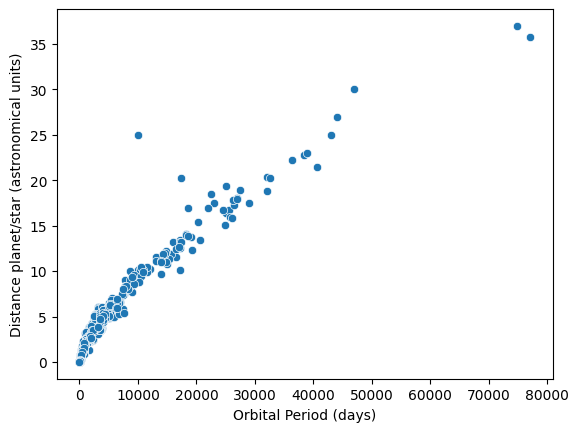

In [36]:
#What is the duration of a planet's orbit around its star ?
# 'pl_orbsmax'-> Orbit Semi-Major Axis [au]): Orbital radius in astronomical units = the distance from a planet to its star.
# For Earth, this would be 1.
# 'pl_orbper' : Orbital Period [days]: Duration in days of the planet's orbit (for Earth, it would be 365, for example).
sns.scatterplot(x='pl_orbper', y='pl_orbsmax', data=exoplanet)
plt.xlabel('Orbital Period (days)')
plt.ylabel('Distance planet/star (astronomical units)')
plt.show()


In [38]:
# X-y split
X = exoplanet[['pl_orbper']]
y = exoplanet['pl_orbsmax']
# First column for which all the values will be 1
# Second column for which all the values will be the values in the original column
# Third column for which the values will be the square of the original column
# Fourth column for which the values will be the cube of the original column

In [39]:
# Train-test split
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(X_train)

# Save pol with pickle
X_train_pol_np = poly.transform(X_train)
X_test_pol_np = poly.transform(X_test)

X_train_pol_df = pd.DataFrame(X_train_pol_np, columns=poly.get_feature_names_out(), index=X_train.index)
X_test_pol_df  = pd.DataFrame(X_test_pol_np, columns=poly.get_feature_names_out(), index=X_test.index)

In [41]:
# Linear Regression model
linear_reg = LinearRegression()

In [42]:
#train the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
# predict on the test set
y_pred = linear_reg.predict(X_test)